# <center>ADANI ENTERPRISES LIMITED

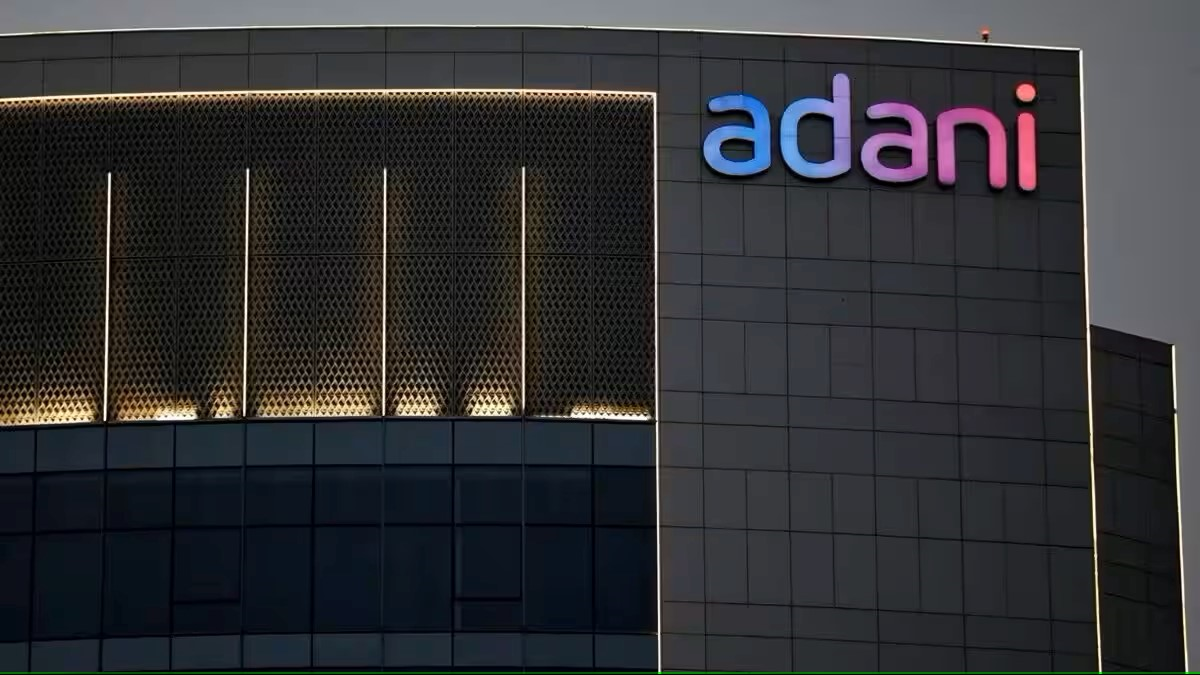

### ATTRIBUTE INFORMATION

#### DATA SET : 'Quote-Equity-ADANIENT-EQ-18-03-2021-to-18-03-2023 (1).csv' IS OBTAINED FROM KAGGLE

https://www.nseindia.com/get-quotes/equity?symbol=ADANIENT

# <center>ABOUT DATASET

### The dataset contains details of ADANI ENTERPRISES LIMITED stocks from 2021 to 2023. 

##### The dataset you provided is related to the stock price of Adani Enterprises Limited (ADANIENT) traded on the National Stock Exchange (NSE) in India.
##### The data includes the following fields:

->Date: This column represents the date for which the stock market data is being presented.

->Series: This column represents the series of the stock. Stocks can be traded in different series such as equity shares, 
preference shares, or debentures, among others.

->OPEN: This column represents the opening price of the stock on the given date.

->HIGH: This column represents the highest price at which the stock traded during the day on the given date.

->LOW: This column represents the lowest price at which the stock traded during the day on the given date.

->PREV. CLOSE: This column represents the closing price of the stock on the previous trading day.

->LTP: This column represents the last traded price of the stock on the given date.

->CLOSE: This column represents the closing price of the stock on the given date.

->VWAP: This column represents the Volume Weighted Average Price of the stock on the given date.

->52W H: This column represents the highest price at which the stock traded in the past 52 weeks.

->52W L: This column represents the lowest price at which the stock traded in the past 52 weeks.

->VOLUME: This column represents the total number of shares traded on the given date.

->VALUE: This column represents the total value of shares traded on the given date.

->No of trades: This column represents the total number of trades executed on the given date.

#### Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset


In [2]:
df=pd.read_csv(r"C:\Users\91948\OneDrive\Desktop\projects\ml and python projects\Adani stock predicction regreesion\Quote-Equity-ADANIENT-EQ-18-03-2021-to-18-03-2023 (1).csv")

In [3]:
df

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,17-Mar-2023,EQ,"1,901.00","1,918.85","1,845.00","1,843.80","1,874.00","1,876.55","1,870.80","4,190.00","1,017.45",5969594,"11,167,944,229.35",263971
1,16-Mar-2023,EQ,"1,861.00","1,875.00","1,795.00","1,839.00","1,840.00","1,843.80","1,838.73","4,190.00","1,017.45",6509495,"11,969,202,063.80",311541
2,15-Mar-2023,EQ,"1,760.90","1,891.45","1,728.10","1,738.20","1,838.00","1,839.00","1,809.83","4,190.00","1,017.45",12296703,"22,254,903,981.50",573832
3,14-Mar-2023,EQ,"1,874.00","1,874.85","1,651.35","1,874.40","1,730.00","1,738.20","1,742.93","4,190.00","1,017.45",12679663,"22,099,819,684.25",551558
4,13-Mar-2023,EQ,"1,917.00","1,985.00","1,857.40","1,896.20","1,859.00","1,874.40","1,922.43","4,190.00","1,017.45",7572604,"14,557,763,249.80",373128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,24-Mar-2021,EQ,"1,063.00","1,093.00","1,018.40","1,058.40","1,020.35","1,025.45","1,060.20","1,093.00",116.40,22877032,"24,254,123,461.00",381907
493,23-Mar-2021,EQ,999.00,"1,086.70",991.05,991.05,"1,060.00","1,058.40","1,057.72","1,086.70",116.40,31098225,"32,893,205,021.80",508458
494,22-Mar-2021,EQ,892.90,"1,003.00",883.45,889.65,992.50,991.05,965.79,"1,003.00",116.40,22596465,"21,823,390,368.20",314562
495,19-Mar-2021,EQ,866.00,895.40,840.20,871.05,885.50,889.65,870.63,944.90,116.40,4794995,"4,174,660,013.65",63473


# <center>DATA EXPLORATION

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           497 non-null    object
 1   series         497 non-null    object
 2   OPEN           497 non-null    object
 3   HIGH           497 non-null    object
 4   LOW            497 non-null    object
 5   PREV. CLOSE    497 non-null    object
 6   ltp            497 non-null    object
 7   close          497 non-null    object
 8   vwap           497 non-null    object
 9   52W H          497 non-null    object
 10  52W L          497 non-null    object
 11  VOLUME         497 non-null    int64 
 12  VALUE          497 non-null    object
 13  No of trades   497 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 54.5+ KB


##### In this data set almost numerical colums having comas so the data type is showing as object we want to change the dtype object to int or float for ML

##### Cheking cloumn names

In [5]:
df.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

##### All Column Names containing extra space so we have to remove them

In [6]:
df.rename(columns={'Date ': 'Date'},inplace=True)
df.rename(columns={'series ':'series'},inplace=True)
df.rename(columns={'OPEN ':'OPEN'},inplace=True)
df.rename(columns={'HIGH ':'HIGH'},inplace=True)
df.rename(columns={'LOW ':'LOW'},inplace=True)
df.rename(columns={'PREV. CLOSE ':'PREV_CLOSE'},inplace=True)
df.rename(columns={'ltp ':'Last_Traded_Price'},inplace=True)
df.rename(columns={'close ':'close'},inplace=True)
df.rename(columns={'vwap ':'Volume_weighted_avg_price'},inplace=True)
df.rename(columns={'52W H ':'52W_H'},inplace=True)
df.rename(columns={'52W L ':'52W_L'},inplace=True)
df.rename(columns={'VOLUME ':'VOLUME'},inplace=True)
df.rename(columns={'VALUE ':'VALUE'},inplace=True)
df.rename(columns={'No of trades ':'No_of_trades'},inplace=True)

In [7]:
df

,Date,series,OPEN,HIGH,LOW,PREV_CLOSE,Last_Traded_Price,close,Volume_weighted_avg_price,52W_H,52W_L,VOLUME,VALUE,No_of_trades
0,17-Mar-2023,EQ,"1,901.00","1,918.85","1,845.00","1,843.80","1,874.00","1,876.55","1,870.80","4,190.00","1,017.45",5969594,"11,167,944,229.35",263971
1,16-Mar-2023,EQ,"1,861.00","1,875.00","1,795.00","1,839.00","1,840.00","1,843.80","1,838.73","4,190.00","1,017.45",6509495,"11,969,202,063.80",311541
2,15-Mar-2023,EQ,"1,760.90","1,891.45","1,728.10","1,738.20","1,838.00","1,839.00","1,809.83","4,190.00","1,017.45",12296703,"22,254,903,981.50",573832
3,14-Mar-2023,EQ,"1,874.00","1,874.85","1,651.35","1,874.40","1,730.00","1,738.20","1,742.93","4,190.00","1,017.45",12679663,"22,099,819,684.25",551558
4,13-Mar-2023,EQ,"1,917.00","1,985.00","1,857.40","1,896.20","1,859.00","1,874.40","1,922.43","4,190.00","1,017.45",7572604,"14,557,763,249.80",373128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,24-Mar-2021,EQ,"1,063.00","1,093.00","1,018.40","1,058.40","1,020.35","1,025.45","1,060.20","1,093.00",116.40,22877032,"24,254,123,461.00",381907
493,23-Mar-2021,EQ,999.00,"1,086.70",991.05,991.05,"1,060.00","1,058.40","1,057.72","1,086.70",116.40,31098225,"32,893,205,021.80",508458
494,22-Mar-2021,EQ,892.90,"1,003.00",883.45,889.65,992.50,991.05,965.79,"1,003.00",116.40,22596465,"21,823,390,368.20",314562
495,19-Mar-2021,EQ,866.00,895.40,840.20,871.05,885.50,889.65,870.63,944.90,116.40,4794995,"4,174,660,013.65",63473


 opening price means peak value of stock in 24 hours it would comapred with listed price of market

In [8]:
df['OPEN'].max()

'999.00'

In [9]:
df['OPEN'].min()

'1,000.00'

highest opening price of adani stock is 4175 and lowest 866 in a day. 

In [10]:
df['LOW'].max()

'991.05'

In [11]:
df['LOW'].min()

'1,016.60'

here we can see that max of lowest price is good in adani company here we can get an idea that adani is performing well in the market.beacause max price of low is 4066.4 
max price is 4175 there is no much difference 

In [12]:
df.columns

Index(['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV_CLOSE',
       'Last_Traded_Price', 'close', 'Volume_weighted_avg_price', '52W_H',
       '52W_L', 'VOLUME', 'VALUE', 'No_of_trades'],
      dtype='object')

In [13]:
df.shape

(497, 14)

In [14]:
print(df['HIGH'].dtype)

object


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date                       497 non-null    object
 1   series                     497 non-null    object
 2   OPEN                       497 non-null    object
 3   HIGH                       497 non-null    object
 4   LOW                        497 non-null    object
 5   PREV_CLOSE                 497 non-null    object
 6   Last_Traded_Price          497 non-null    object
 7   close                      497 non-null    object
 8   Volume_weighted_avg_price  497 non-null    object
 9   52W_H                      497 non-null    object
 10  52W_L                      497 non-null    object
 11  VOLUME                     497 non-null    int64 
 12  VALUE                      497 non-null    object
 13  No_of_trades               497 non-null    int64 
dtypes: int64(2

### Cleaning The Dataset

In [16]:
df['OPEN'] = df['OPEN'].str.replace(',', '',)
df['HIGH'] = df['HIGH'].str.replace(',', '')
df['LOW'] = df['LOW'].str.replace(',', '')
df['PREV_CLOSE'] = df['PREV_CLOSE'].str.replace(',', '')
df['Last_Traded_Price'] = df['Last_Traded_Price'].str.replace(',', '')
df['close'] = df['close'].str.replace(',', '')
df['52W_H'] = df['52W_H'].str.replace(',', '')
df['Volume_weighted_avg_price'] = df['Volume_weighted_avg_price'].str.replace(',', '')
df['52W_L'] = df['52W_L'].str.replace(',', '')

In [17]:
df['OPEN'] = df['OPEN'].astype(float)
df['HIGH'] = df['HIGH'].astype(float)
df['LOW'] = df['LOW'].astype(float)
df['PREV_CLOSE'] = df['PREV_CLOSE'].astype(float)
df['Last_Traded_Price'] = df['Last_Traded_Price'].astype(float)
df['52W_H'] = df['52W_H'].astype(float)
df['Volume_weighted_avg_price'] = df['Volume_weighted_avg_price'].astype(float)
df['52W_L'] = df['52W_L'].astype(float)
df['close'] = df['close'].astype(float)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       497 non-null    object 
 1   series                     497 non-null    object 
 2   OPEN                       497 non-null    float64
 3   HIGH                       497 non-null    float64
 4   LOW                        497 non-null    float64
 5   PREV_CLOSE                 497 non-null    float64
 6   Last_Traded_Price          497 non-null    float64
 7   close                      497 non-null    float64
 8   Volume_weighted_avg_price  497 non-null    float64
 9   52W_H                      497 non-null    float64
 10  52W_L                      497 non-null    float64
 11  VOLUME                     497 non-null    int64  
 12  VALUE                      497 non-null    object 
 13  No_of_trades               497 non-null    int64  

here we can observe that we have changed the datatype of required column

here we are going to drop series because it is of no use the series is common to all so we are droping that particular column

In [19]:
df.drop('series', axis=1, inplace=True)

In [20]:
df

,Date,OPEN,HIGH,LOW,PREV_CLOSE,Last_Traded_Price,close,Volume_weighted_avg_price,52W_H,52W_L,VOLUME,VALUE,No_of_trades
0,17-Mar-2023,1901.0,1918.85,1845.00,1843.80,1874.00,1876.55,1870.80,4190.0,1017.45,5969594,"11,167,944,229.35",263971
1,16-Mar-2023,1861.0,1875.00,1795.00,1839.00,1840.00,1843.80,1838.73,4190.0,1017.45,6509495,"11,969,202,063.80",311541
2,15-Mar-2023,1760.9,1891.45,1728.10,1738.20,1838.00,1839.00,1809.83,4190.0,1017.45,12296703,"22,254,903,981.50",573832
3,14-Mar-2023,1874.0,1874.85,1651.35,1874.40,1730.00,1738.20,1742.93,4190.0,1017.45,12679663,"22,099,819,684.25",551558
4,13-Mar-2023,1917.0,1985.00,1857.40,1896.20,1859.00,1874.40,1922.43,4190.0,1017.45,7572604,"14,557,763,249.80",373128
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,24-Mar-2021,1063.0,1093.00,1018.40,1058.40,1020.35,1025.45,1060.20,1093.0,116.40,22877032,"24,254,123,461.00",381907
493,23-Mar-2021,999.0,1086.70,991.05,991.05,1060.00,1058.40,1057.72,1086.7,116.40,31098225,"32,893,205,021.80",508458
494,22-Mar-2021,892.9,1003.00,883.45,889.65,992.50,991.05,965.79,1003.0,116.40,22596465,"21,823,390,368.20",314562
495,19-Mar-2021,866.0,895.40,840.20,871.05,885.50,889.65,870.63,944.9,116.40,4794995,"4,174,660,013.65",63473


In [21]:
df.isnull().sum()

Date                         0
OPEN                         0
HIGH                         0
LOW                          0
PREV_CLOSE                   0
Last_Traded_Price            0
close                        0
Volume_weighted_avg_price    0
52W_H                        0
52W_L                        0
VOLUME                       0
VALUE                        0
No_of_trades                 0
dtype: int64

 there is no null values in the given dataset

# <center>Data Visualisation Method

# <center>Univariate Analysis

### Checking Outlier

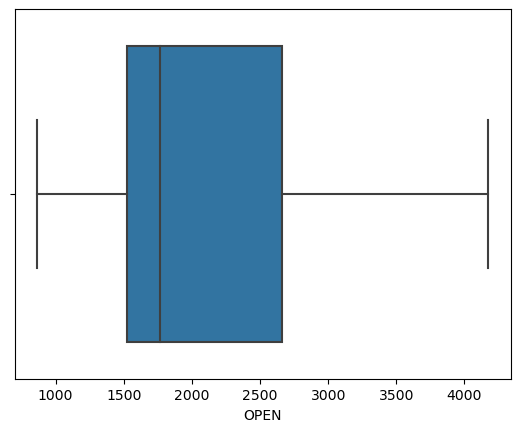

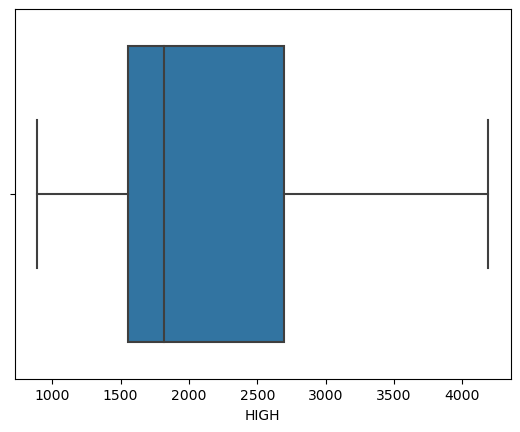

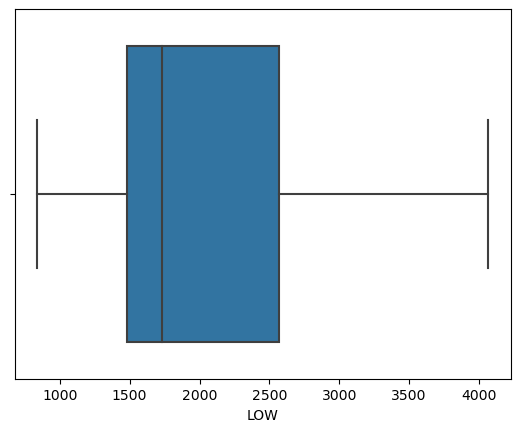

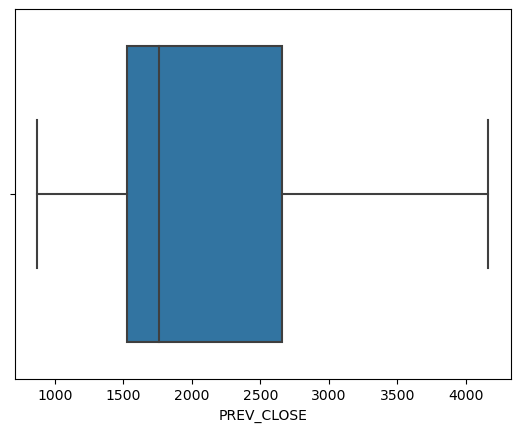

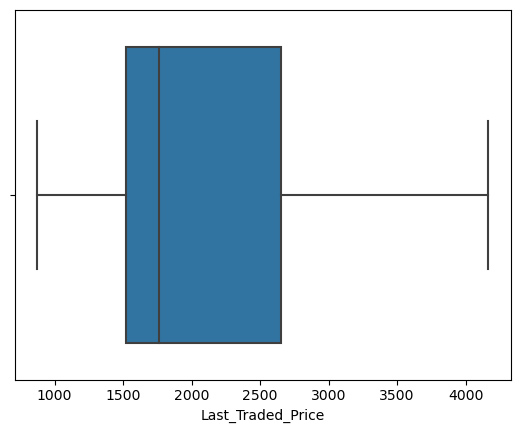

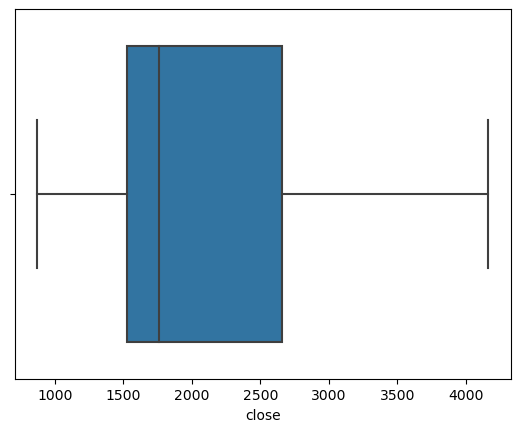

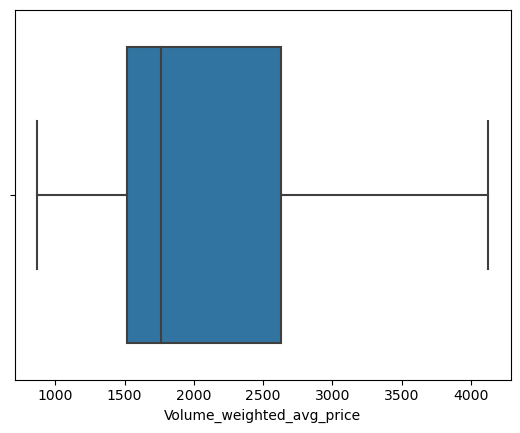

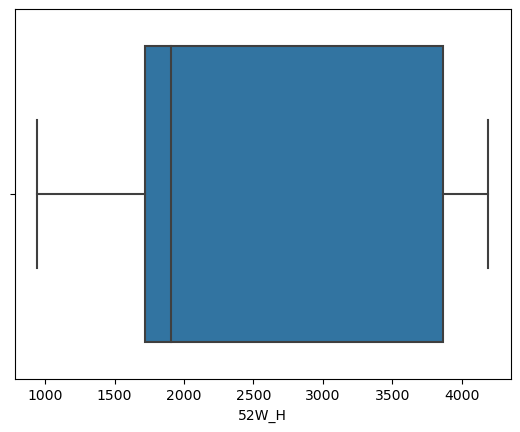

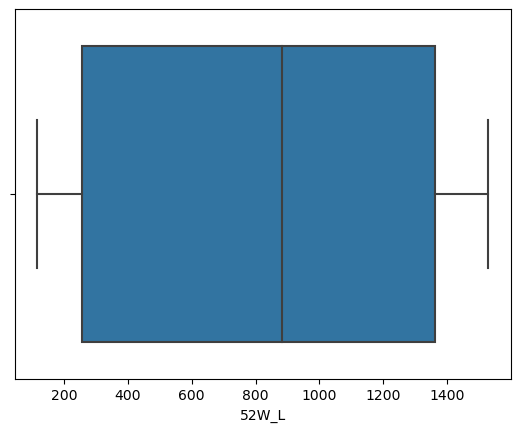

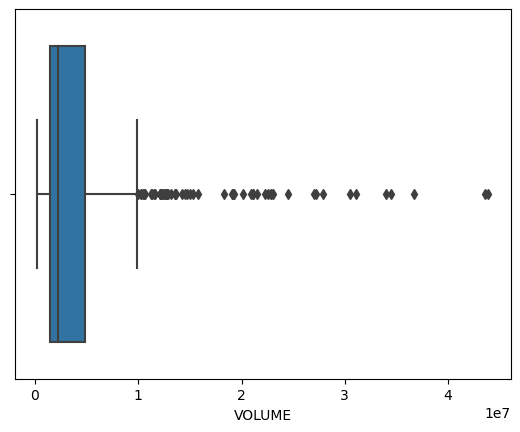

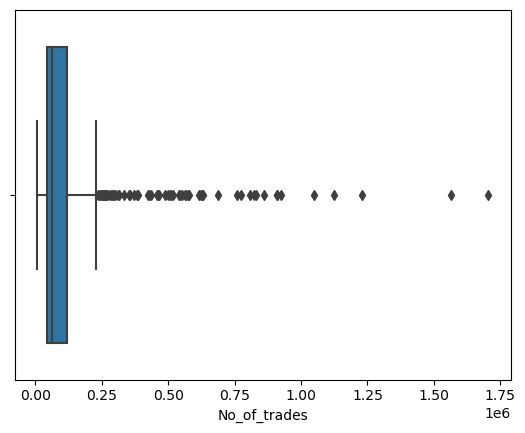

In [22]:
#Boxplot
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(x=df[i])
        plt.show()

there are some outliers in some column so are going to remove outliers through iqr method 

In [23]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*Q1
    return UL,LL

In [24]:
for column in df.columns:
    if df[column].dtype!='object':
        UL,LL=outlier_limit(df[column])
        df[column]=np.where((df[column]>UL)|(df[column]<LL),np.nan,df[column])

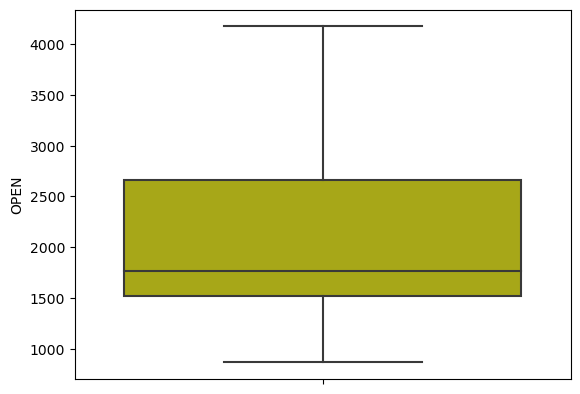

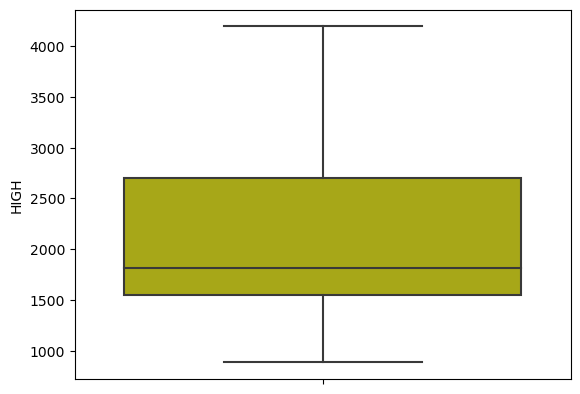

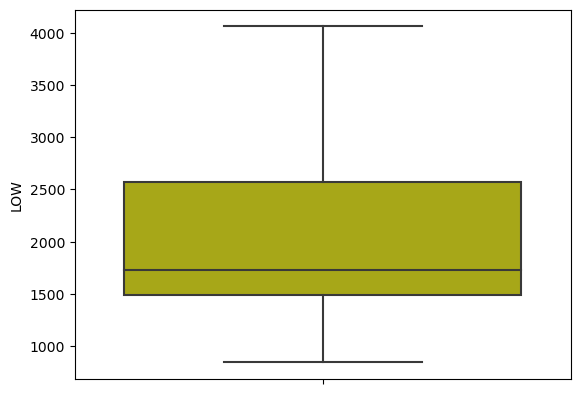

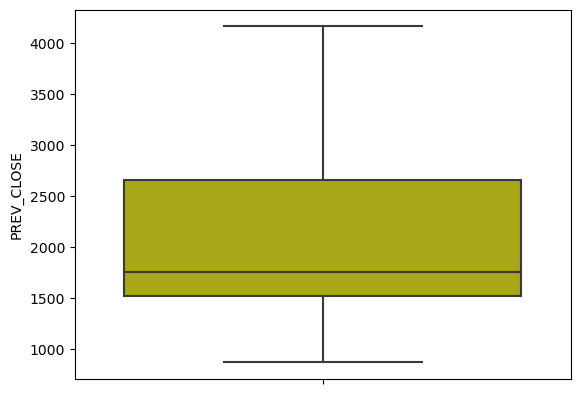

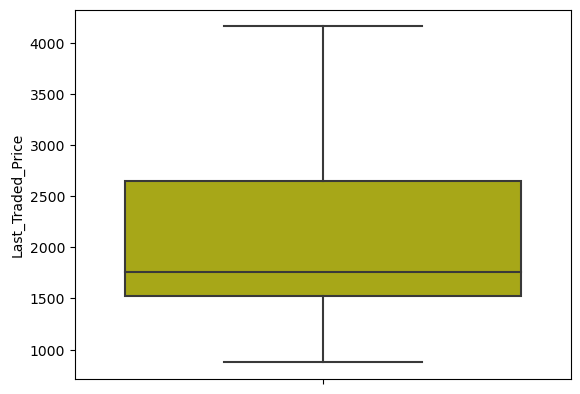

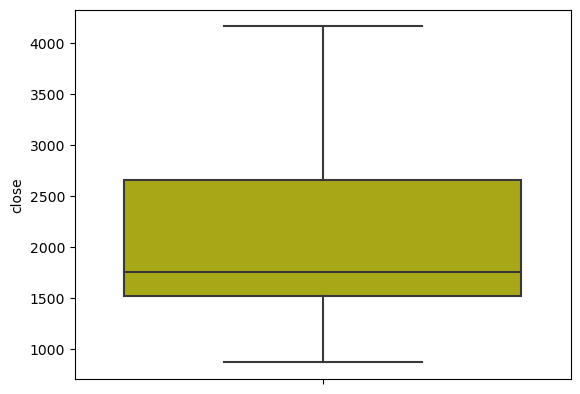

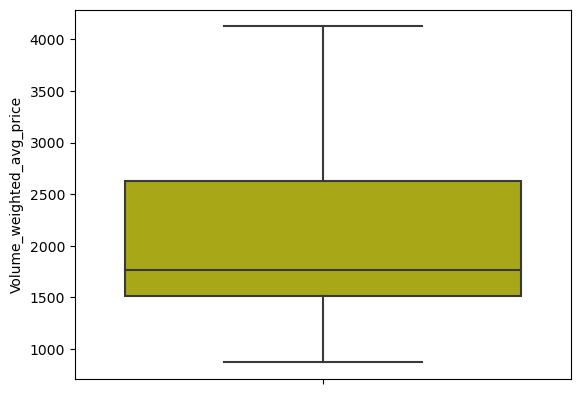

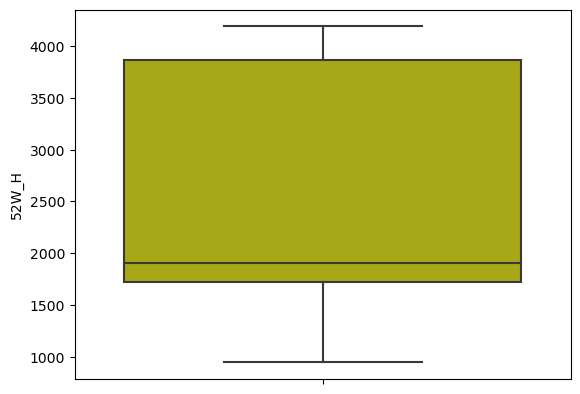

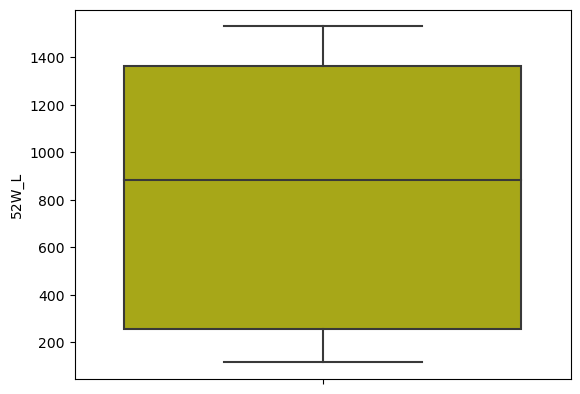

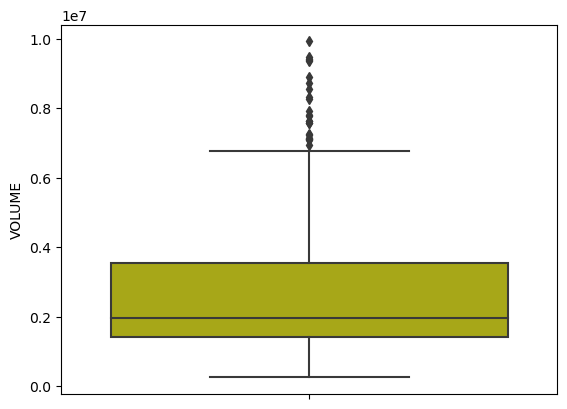

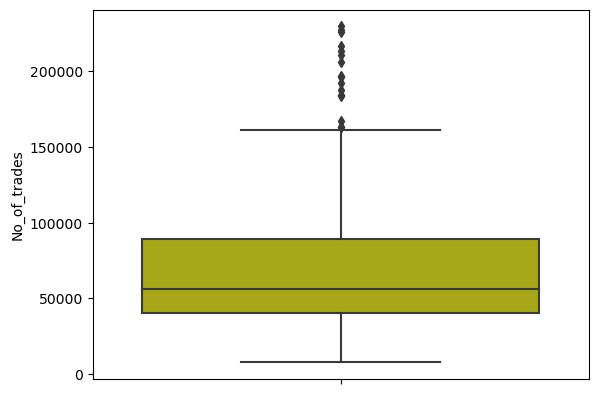

In [25]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i],color='y')
        plt.show()

In [26]:
df.dropna(inplace=True)

# <center>EXPLORATORY DATA ANALYSIS(EDA)


 checking the distribution of the dataset

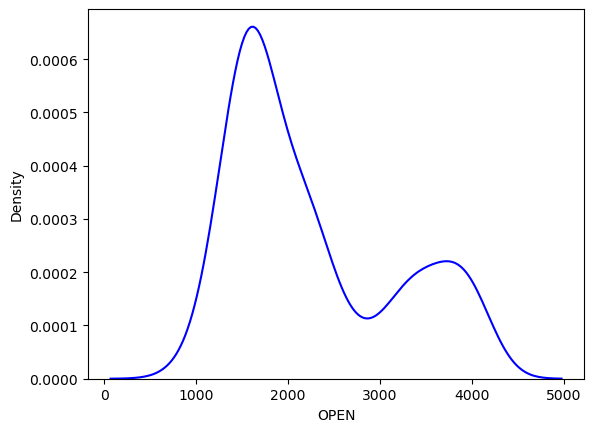

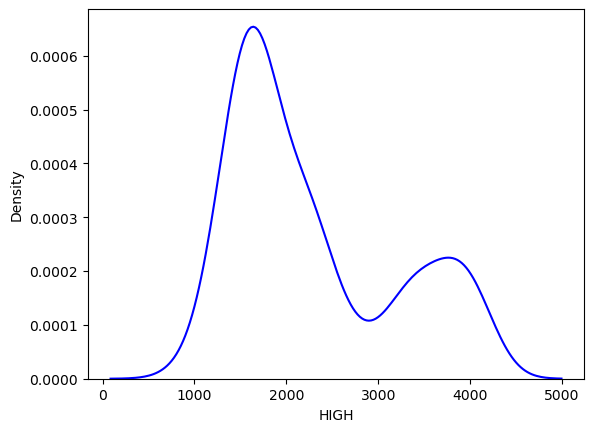

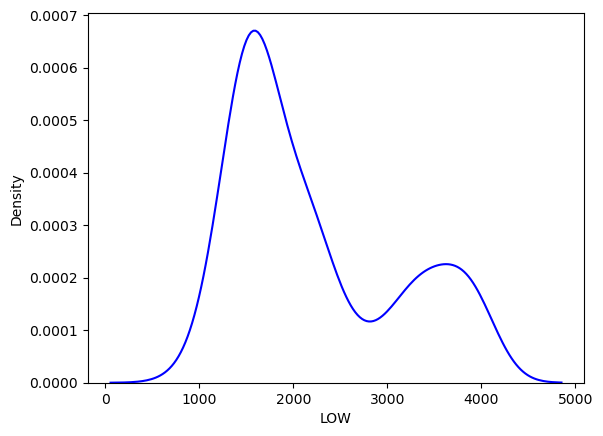

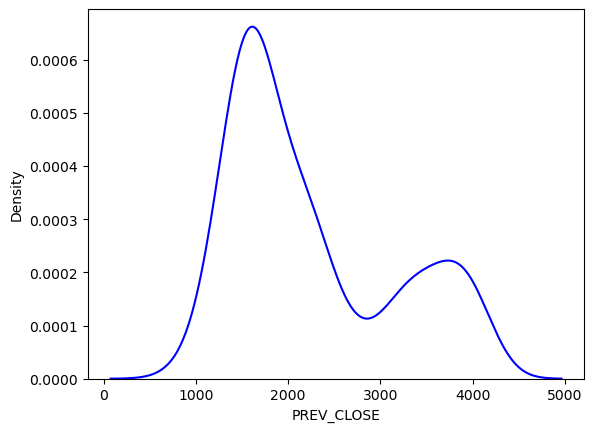

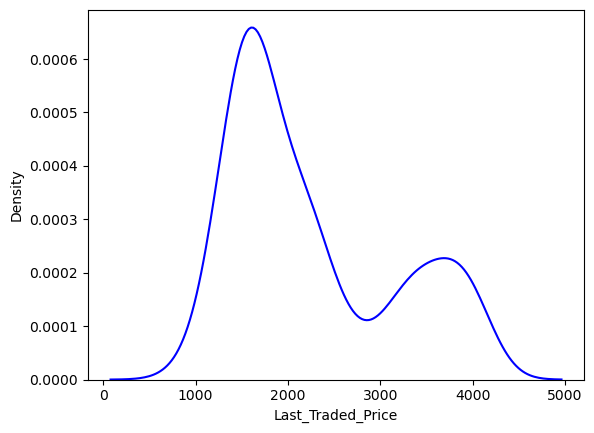

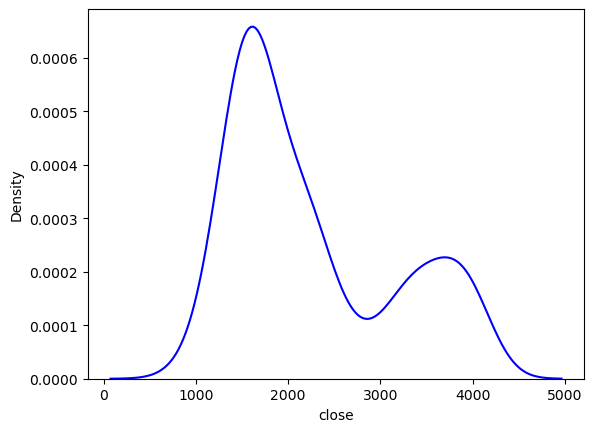

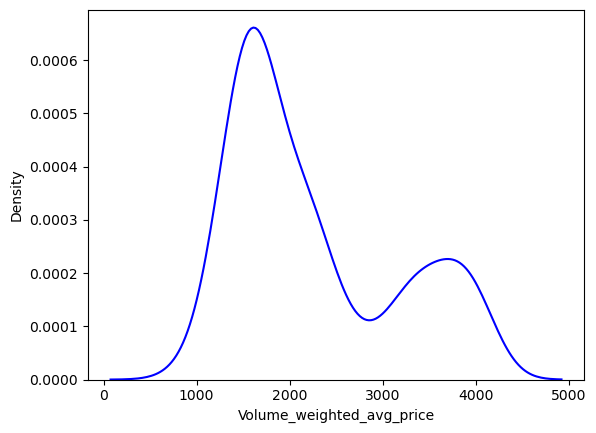

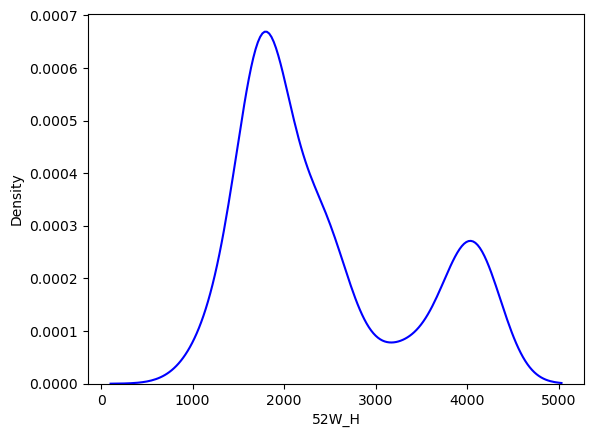

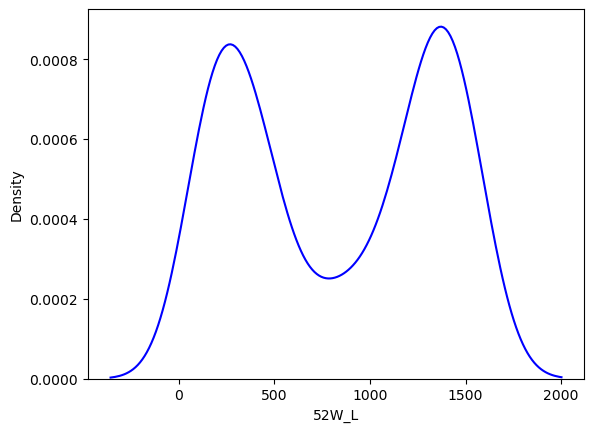

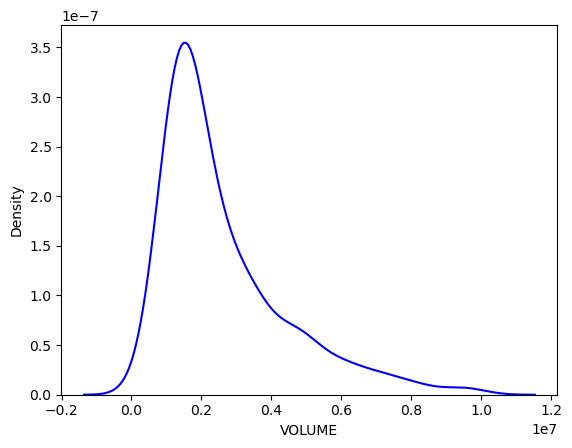

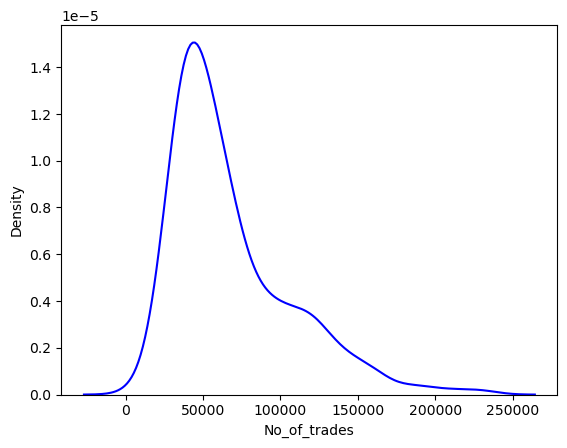

In [27]:
 
for i in df.columns:
    if df[i].dtype !="object":
        sns.kdeplot(x=df[i],color='b')
        plt.show()

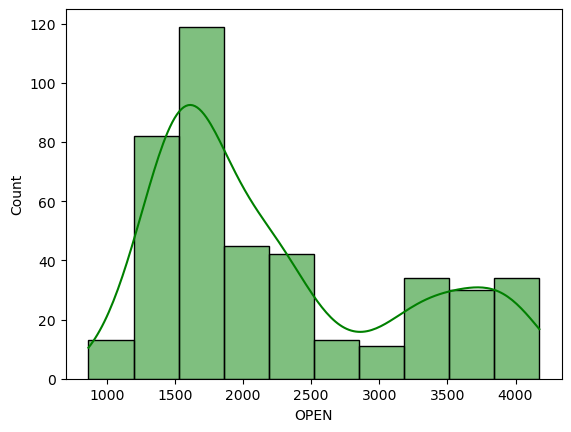

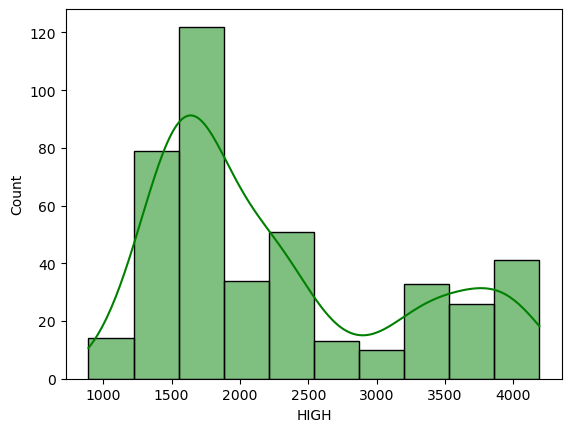

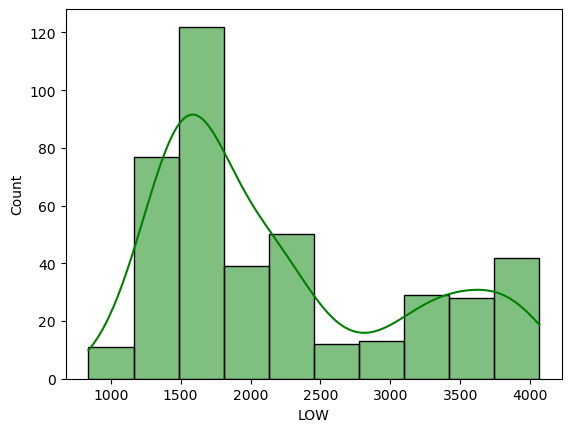

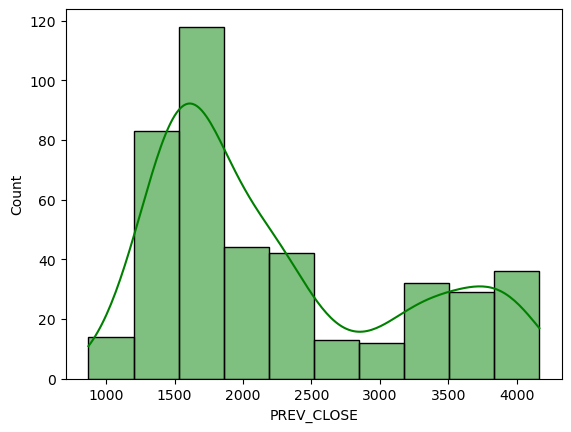

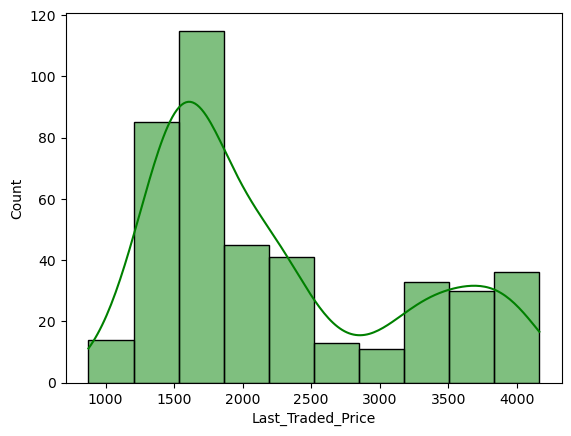

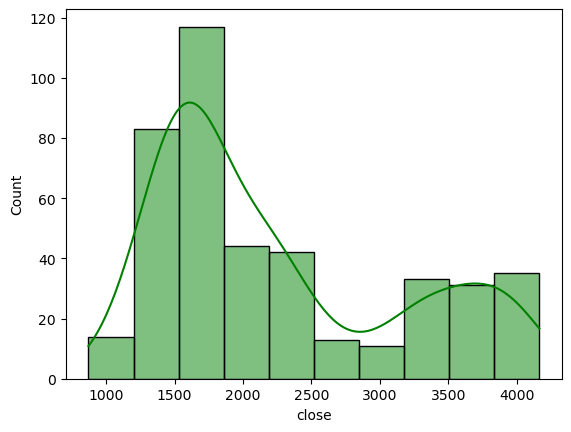

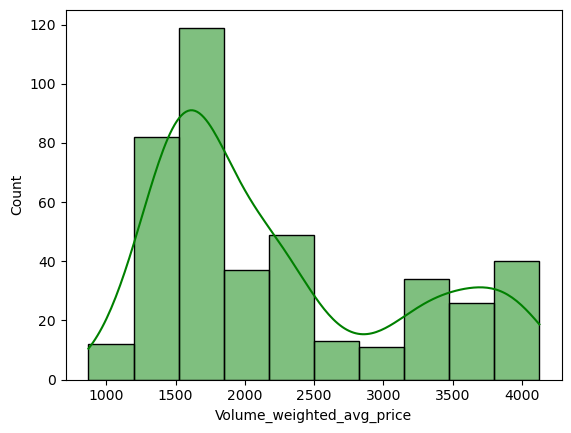

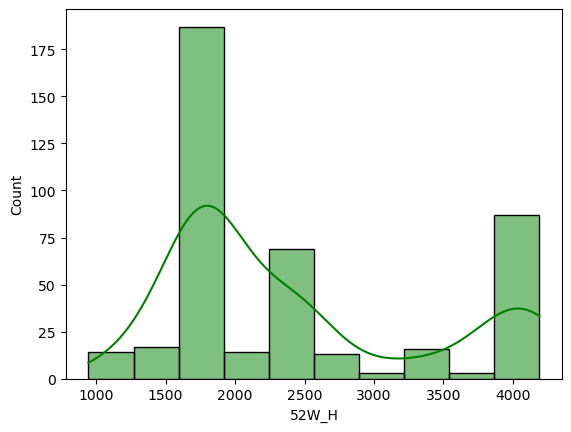

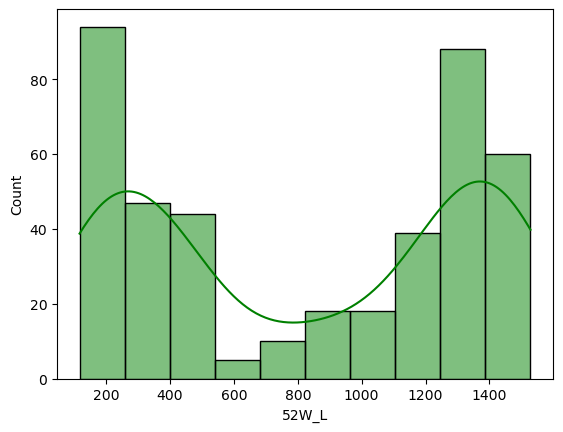

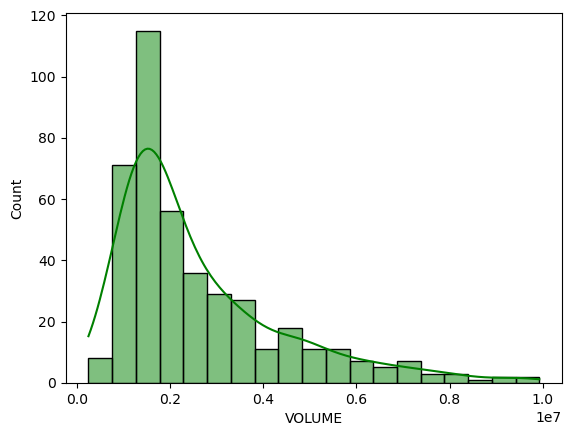

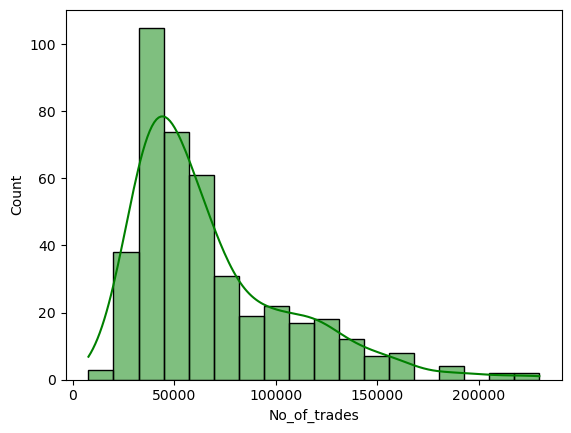

In [28]:
#enabling density function in order to get more clarity of the data
for column in df.columns:
    if df[column].dtypes !='object':
        sns.histplot(x=df[column],kde=True,color='green')
        plt.show()

# <center>Multivariate analysis

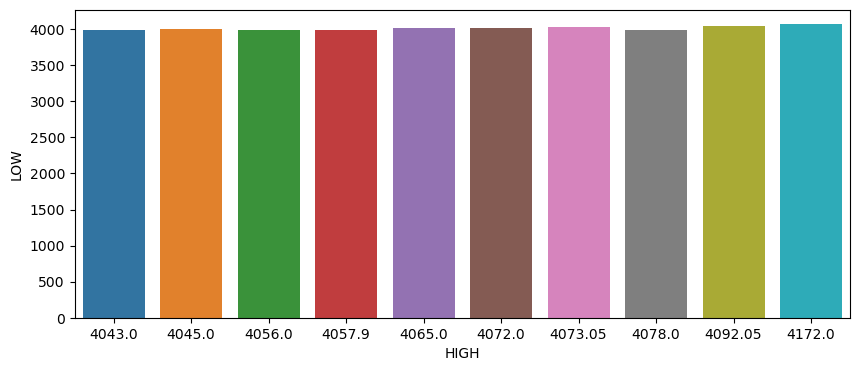

In [29]:
#Barplot
plt.figure(figsize=(10,4))
sns.barplot(x='HIGH',y='LOW',data=df.sort_values(by='LOW',ascending=False)[:10]);

 here we can observe that lowest adani stock price  was 4043 an highest was 4172 in day

<function matplotlib.pyplot.show(close=None, block=None)>

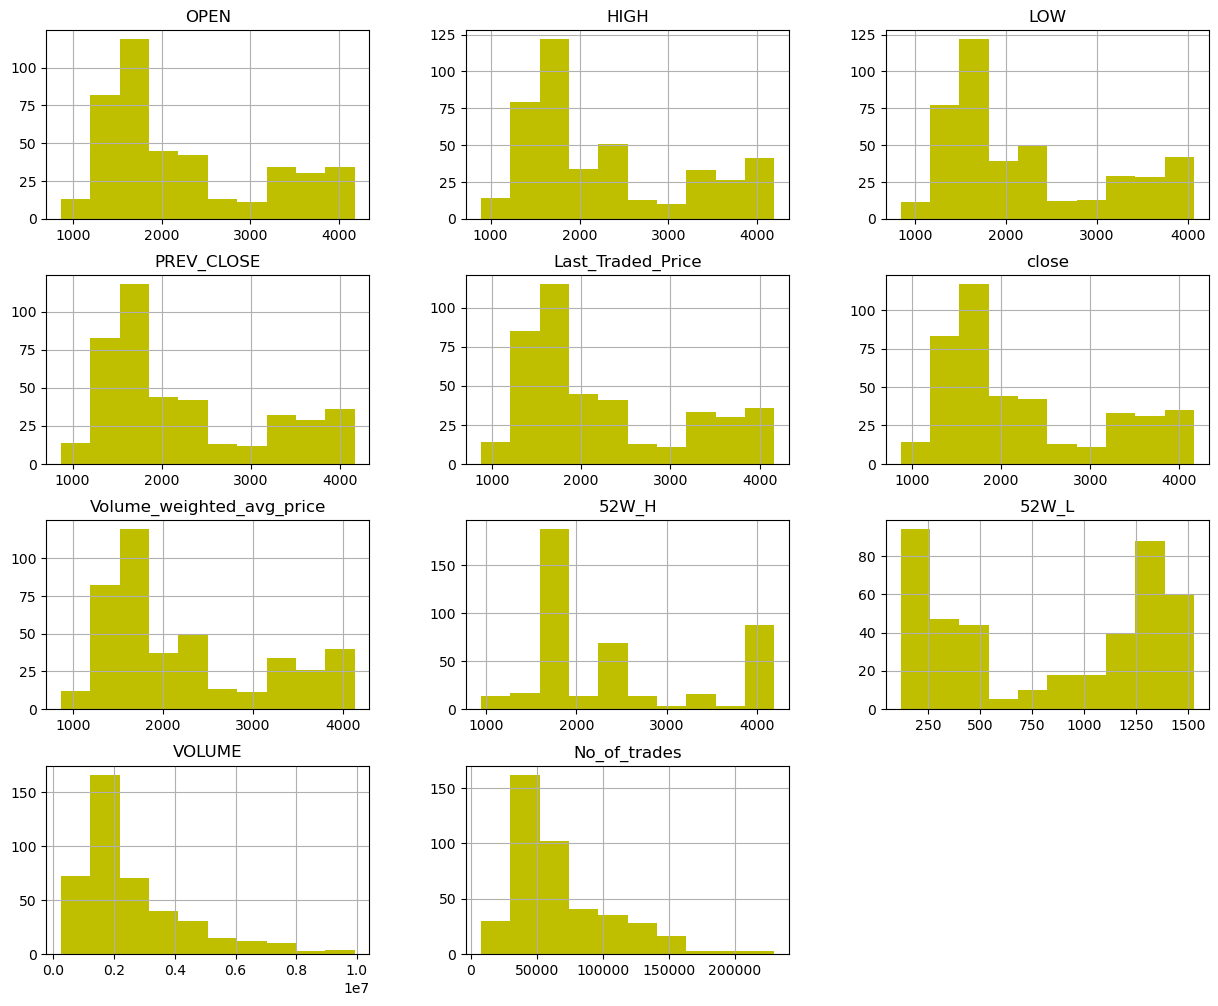

In [30]:
#histogram 
df.hist(figsize=(15,12),color='y');
plt.show

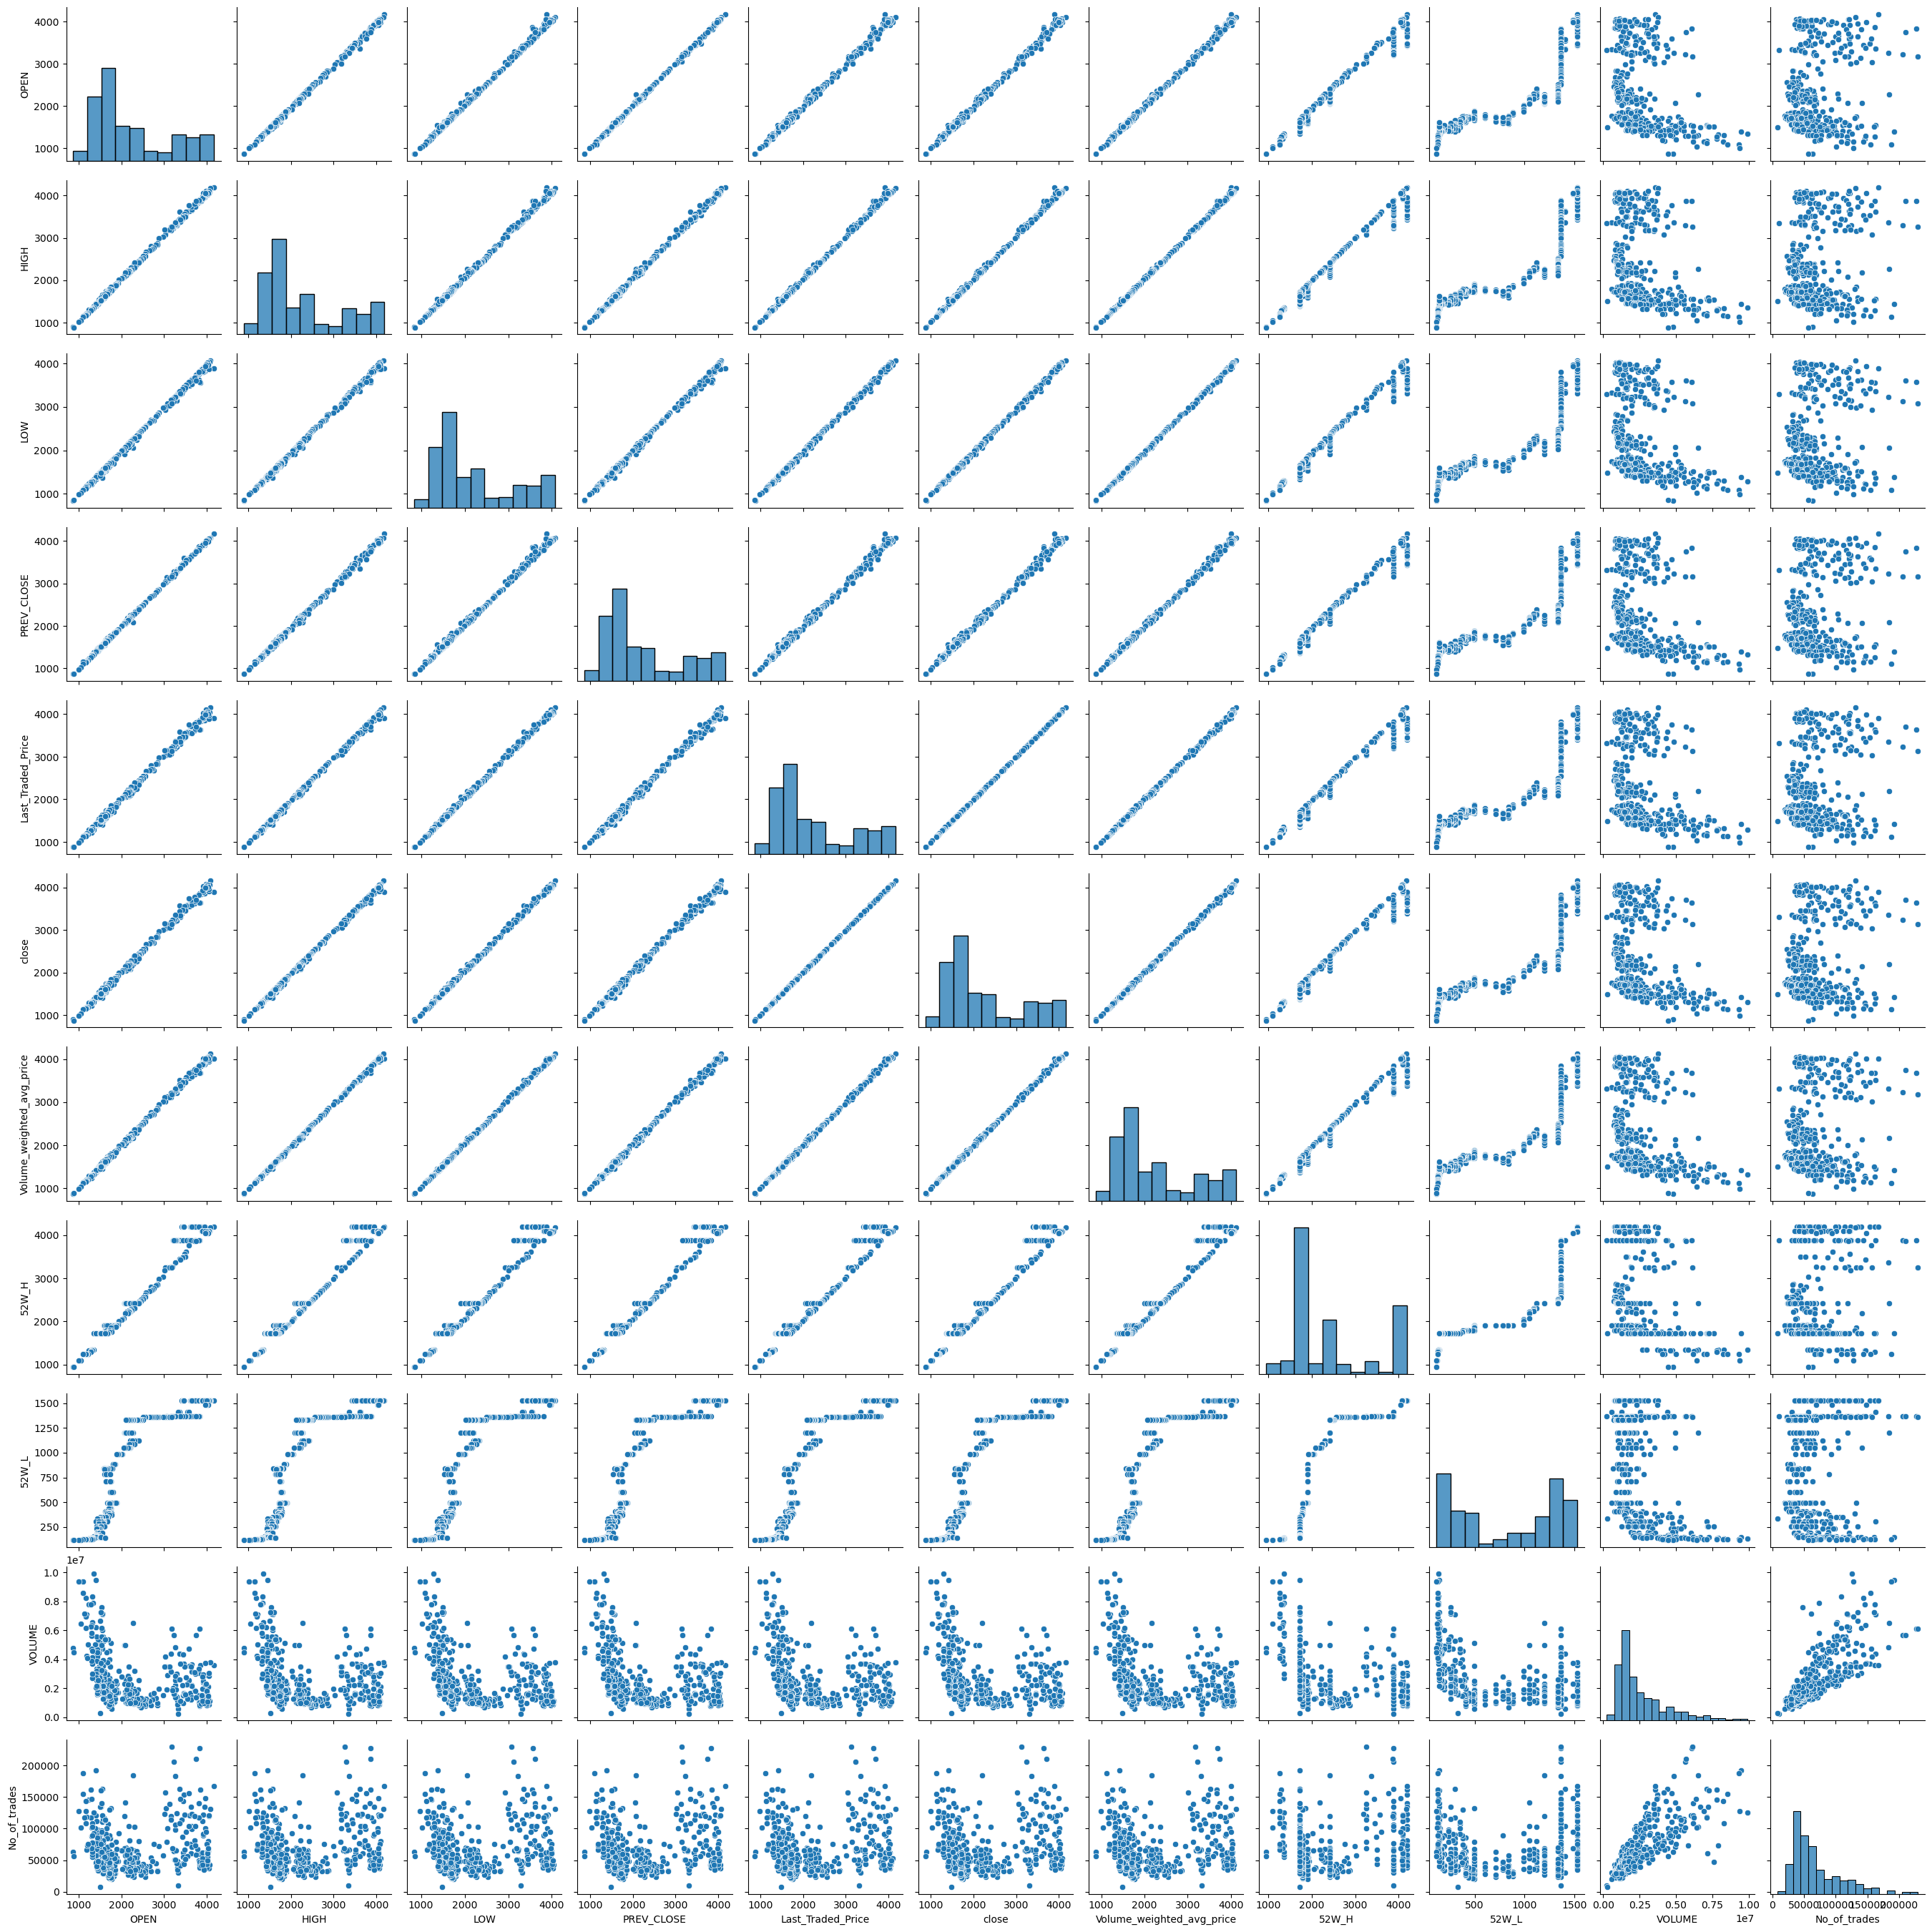

In [31]:
# pairplot of dataframe
sns.pairplot( df )

<AxesSubplot:>

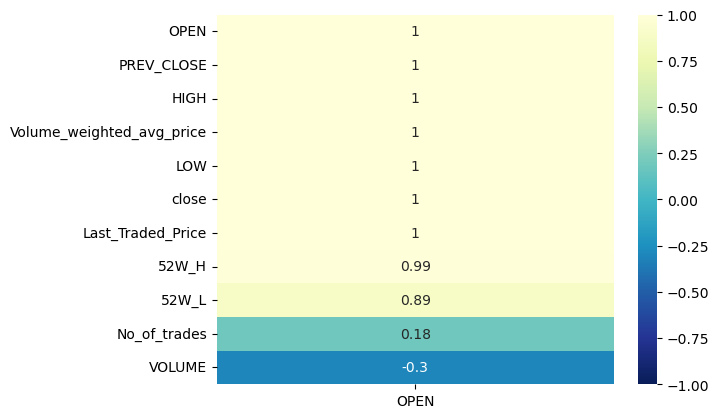

In [32]:
### Heatmap
sns.heatmap(df.corr()[['OPEN']].sort_values(by='OPEN', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlGnBu_r')

 almost all columes are positively correlated to each other except no_of_trades and volume so we are going to just drop it is of no use 

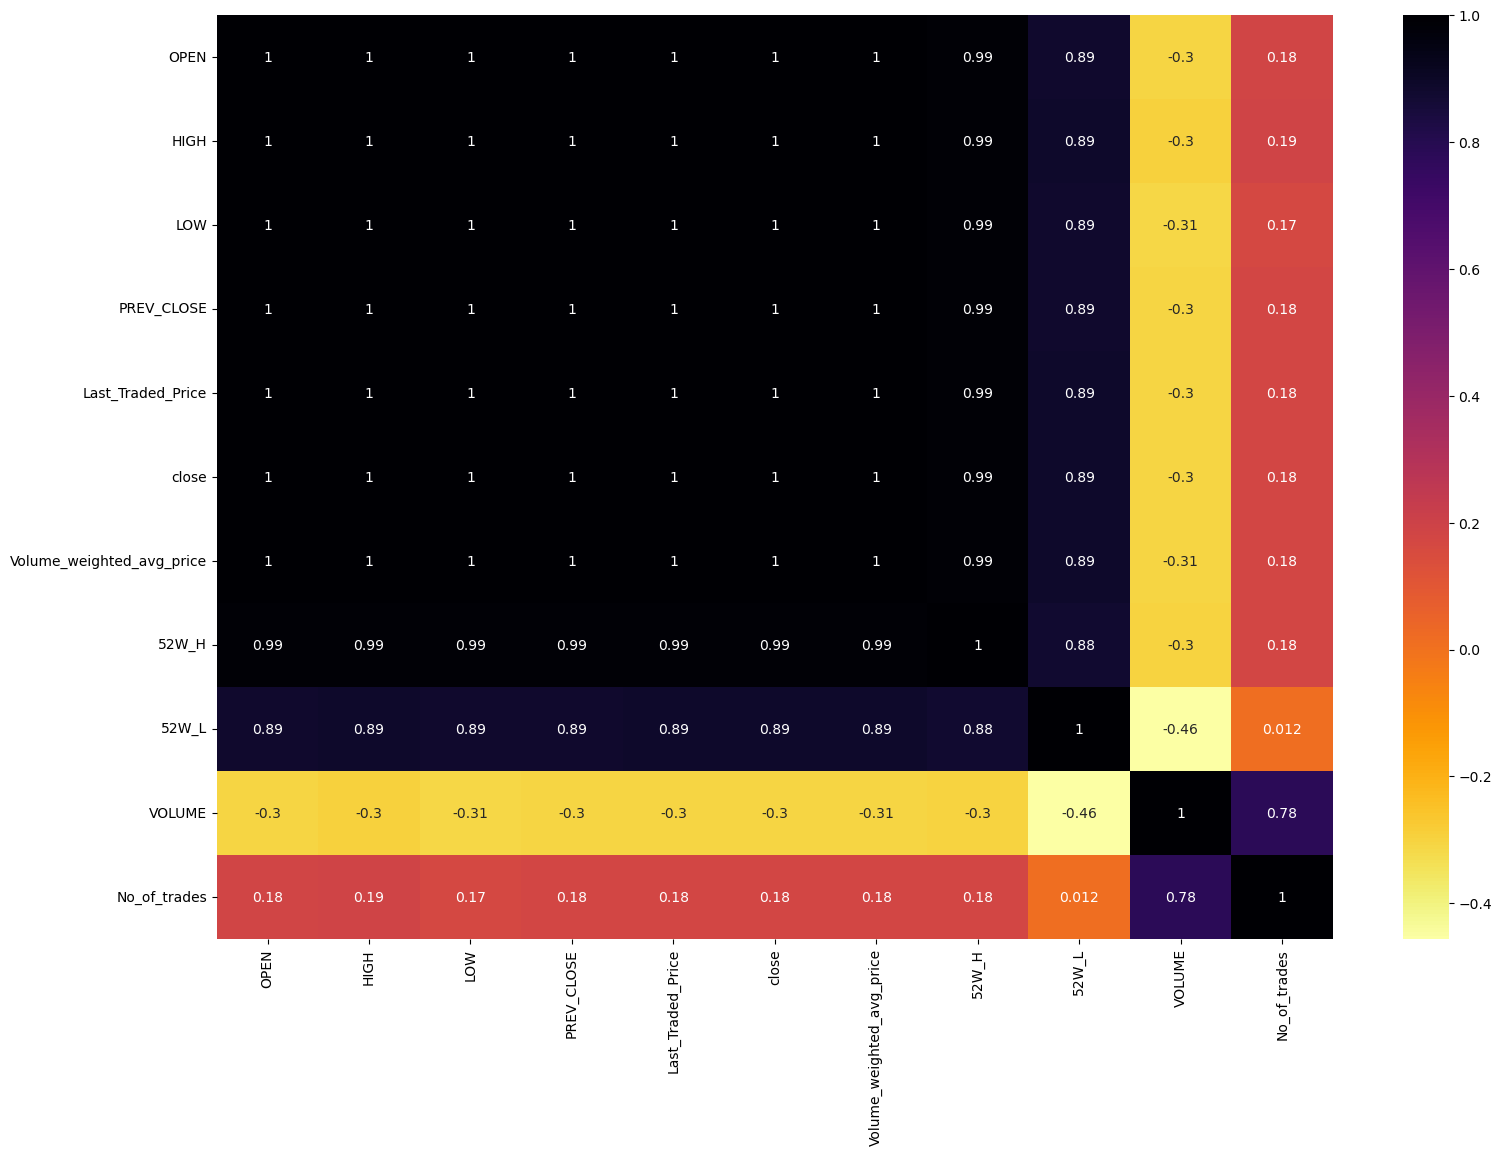

In [33]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=True,cmap="inferno_r")
plt.show()

In [34]:
df.columns

Index(['Date', 'OPEN', 'HIGH', 'LOW', 'PREV_CLOSE', 'Last_Traded_Price',
       'close', 'Volume_weighted_avg_price', '52W_H', '52W_L', 'VOLUME',
       'VALUE', 'No_of_trades'],
      dtype='object')

# <center>MODEL SELECTION AND TRAINING



as per this data were are taking listed price as target varibale. in this seniaro listed price is one of the important factor in
stock market so it contains so much of information so we are going to select 'open'(listed_price) as our target variable. and highlow, last_traded_price as our independent variable.


In [35]:
# seperating the dependent and independent variables
x=df[['HIGH','LOW','Last_Traded_Price','close']].values
y=df[['OPEN']].values

In [36]:
sc=StandardScaler()

In [37]:
x=sc.fit_transform(x)

In [38]:
x

array([[ 1.27919045,  1.2621007 ,  1.30522544,  1.28630738],
       [ 1.36833141,  1.39335622,  1.34572605,  1.34600661],
       [ 1.31484683,  1.37343962,  1.34403853,  1.33964844],
       ...,
       [-1.4056796 , -1.40523978, -1.41247785, -1.41523729],
       [-1.54278954, -1.56251813, -1.52925461, -1.52625197],
       [-1.5476923 , -1.5424874 , -1.54129229, -1.54718327]])

# <center>CROSS VALIDATION

In [39]:
from sklearn.model_selection import cross_val_score
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor()}
    


# Doing train_test_split 


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# <center>MODEL BUILDING


# Linear regression

In [41]:
LR=LinearRegression()

In [42]:
LR.fit(x_train,y_train)

LinearRegression()

In [43]:
x_train.shape,y_train.shape

((338, 4), (338, 1))

In [44]:
LR_pred=LR.predict(x_test)

In [45]:
print('Mean Squared Error :',mean_squared_error(y_test,LR_pred))
print('Mean Absolute Error :',mean_absolute_error(y_test,LR_pred))
print('R2_score :',round(r2_score(y_test,LR_pred)*100,2),"%")

Mean Squared Error : 444.82560841046427
Mean Absolute Error : 14.941286650447092
R2_score : 99.94 %


In [46]:
LR.score(x_test, y_test)*100

99.94406775865687

# building model in decision tree regressor

In [47]:
DT = DecisionTreeRegressor()

In [48]:
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [49]:
x_train.shape,y_train.shape

((338, 4), (338, 1))

In [50]:
DT_pred=DT.predict(x_test)

In [51]:
print('Mean Squared Error :',mean_squared_error(y_test,DT_pred))
print('Mean Absolute Error :',mean_absolute_error(y_test,DT_pred))
print('R2_score :',round(r2_score(y_test,DT_pred)*100,2),"%")

Mean Squared Error : 1547.881735294117
Mean Absolute Error : 28.3770588235294
R2_score : 99.81 %


In [52]:
DT.score(x_test, y_test)*100

99.80536980526266

# building model in Random Forest Classifier

In [53]:
RF=RandomForestRegressor()

In [54]:
RF.fit(x_train,y_train)

RandomForestRegressor()

In [55]:
x_train.shape,y_train.shape

((338, 4), (338, 1))

In [57]:
RF_pred=RF.predict(x_test)

In [58]:
print('Mean Squared Error :',mean_squared_error(y_test,RF_pred))
print('Mean Absolute Error :',mean_absolute_error(y_test,RF_pred))
print('R2_score :',round(r2_score(y_test,RF_pred)*100,2),"%")

Mean Squared Error : 708.8139342382386
Mean Absolute Error : 19.938347058823574
R2_score : 99.91 %


In [59]:
RF.score(x_test, y_test)*100

99.91087394410846

# EVALUATION

In [60]:
y_pred = LR.predict(x)

In [61]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,3422.00,3370.979466
1,3447.45,3493.021352
2,3443.05,3435.564114
3,3450.00,3457.031431
4,3470.00,3503.933837
...,...,...
418,1095.00,1100.461267
419,1038.00,1035.182940
420,1000.00,1004.223901
421,866.00,850.431001


# <center>Visualizing the Prediction



# <center>Conclusion

### Based on the regression analysis performed on the Adani stock prediction, the following conclusions can be drawn:

->Relationship between variables: The regression analysis helps identify the relationship between the independent variables (such as historical stock prices, trading volumes, economic indicators, or sector performance) and the dependent variable (Adani stock price). It provides insights into how changes in the independent variables affect the stock price.

->Statistical significance: The regression analysis provides statistical measures, such as coefficients and p-values, to assess the significance of the independent variables in explaining the variation in Adani stock price. A significant p-value indicates that the variable has a meaningful impact on the stock price.

->Predictive power: The regression model can be used to estimate future Adani stock prices based on the identified relationships. By inputting values for the independent variables, the model can generate predictions for the stock price, aiding investors and traders in making informed decisions.

->Model evaluation: Various metrics, such as R-squared (coefficient of determination), adjusted R-squared, and root mean squared error (RMSE), can be used to evaluate the performance of the regression model. A higher R-squared value and a lower RMSE indicate a better fit of the model to the data.

->Assumptions: Regression analysis relies on assumptions, including linearity, independence of errors, homoscedasticity, and normality of residuals. It is important to assess these assumptions to ensure the validity of the regression model and the reliability of its predictions.

->Limitations: Regression analysis has its limitations, such as the assumption of a linear relationship between variables, potential presence of multicollinearity, and the inability to capture all factors that influence stock prices. Other external factors like market sentiment, news events, or regulatory changes may also impact stock prices and should be considered in conjunction with the regression analysis.

It is crucial to note that stock prediction is a challenging task, and regression analysis alone may not provide precise and accurate predictions. It is advisable to combine regression analysis with other techniques, perform thorough validation, and consider additional qualitative factors to make well-informed investment decisions. Regular monitoring and updating of the model based on new data are also essential for maintaining the accuracy and relevance of the predictions.